## Module imports

In [1]:
# this is a bit of a hack to get relative imports 
# to work as if these notebooks were in a package
# change cwd to project root if 'notebooks' in PATH
from os import chdir
from pathlib import Path
if 'notebooks' in str(Path.cwd()):
    chdir('..')


import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import src.constants as const
from src.schemas import DataCatalog
from src.various_methods import PlotCounter, month_num_to_cos, month_num_to_sin, get_workingdays

## Notebook Constants

In [2]:
OLD_AGE_OVER =65
WORKING_AGE=20
REGIONAL_APPOINTMENTS_CATALOG_NAME =  'NHS GP Appointments by Region'
APPOINTMENTS_START_DATE = dt.date(2022,4,1)
NOTEBOOK_ALIAS = 'num_appointments'

## Load Catalog

In [3]:
# load data catalog
catalog =  DataCatalog.load_from_yaml("data_catalog.yaml")
plot_counter = PlotCounter(name=NOTEBOOK_ALIAS)

# Data loading
## **Appointments SUB-ICB level**

In [4]:
# this is the first in the dataset list
gp_appts_catalog_entry = catalog.get_catalog_entry_by_name(REGIONAL_APPOINTMENTS_CATALOG_NAME)

snee_appointments_df = gp_appts_catalog_entry.load() # this loads the zipfile into instance variable
#Combining data for all the ICB's
dfs = []
for ccg_name in gp_appts_catalog_entry.zip_file.namelist():
    gp_appts_catalog_entry.csv_file = ccg_name
    dfs.append(gp_appts_catalog_entry.load())

all_area_appts_df = pd.concat(dfs, axis=0).assign(APPOINTMENT_MONTH=lambda df: pd.to_datetime(df.APPOINTMENT_MONTH))
all_area_appts_df.head()

/tmp/ipykernel_32855/1052631197.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_area_appts_df = pd.concat(dfs, axis=0).assign(APPOINTMENT_MONTH=lambda df: pd.to_datetime(df.APPOINTMENT_MONTH))


,SUB_ICB_LOCATION_CODE,SUB_ICB_LOCATION_ONS_CODE,SUB_ICB_LOCATION_NAME,ICB_ONS_CODE,ICB_NAME,REGION_ONS_CODE,REGION_NAME,APPOINTMENT_MONTH,APPT_STATUS,HCP_TYPE,APPT_MODE,TIME_BETWEEN_BOOK_AND_APPT,COUNT_OF_APPOINTMENTS
0,02T,E38000025,NHS West Yorkshire ICB - 02T,E54000054,NHS West Yorkshire Integrated Care Board,E40000012,North East and Yorkshire,2021-03-01,Attended,GP,Face-to-Face,1 Day,1999
1,02T,E38000025,NHS West Yorkshire ICB - 02T,E54000054,NHS West Yorkshire Integrated Care Board,E40000012,North East and Yorkshire,2021-03-01,Attended,GP,Face-to-Face,15 to 21 Days,329
2,02T,E38000025,NHS West Yorkshire ICB - 02T,E54000054,NHS West Yorkshire Integrated Care Board,E40000012,North East and Yorkshire,2021-03-01,Attended,GP,Face-to-Face,2 to 7 Days,4194
3,02T,E38000025,NHS West Yorkshire ICB - 02T,E54000054,NHS West Yorkshire Integrated Care Board,E40000012,North East and Yorkshire,2021-03-01,Attended,GP,Face-to-Face,22 to 28 Days,212
4,02T,E38000025,NHS West Yorkshire ICB - 02T,E54000054,NHS West Yorkshire Integrated Care Board,E40000012,North East and Yorkshire,2021-03-01,Attended,GP,Face-to-Face,8 to 14 Days,1101


## Exploration

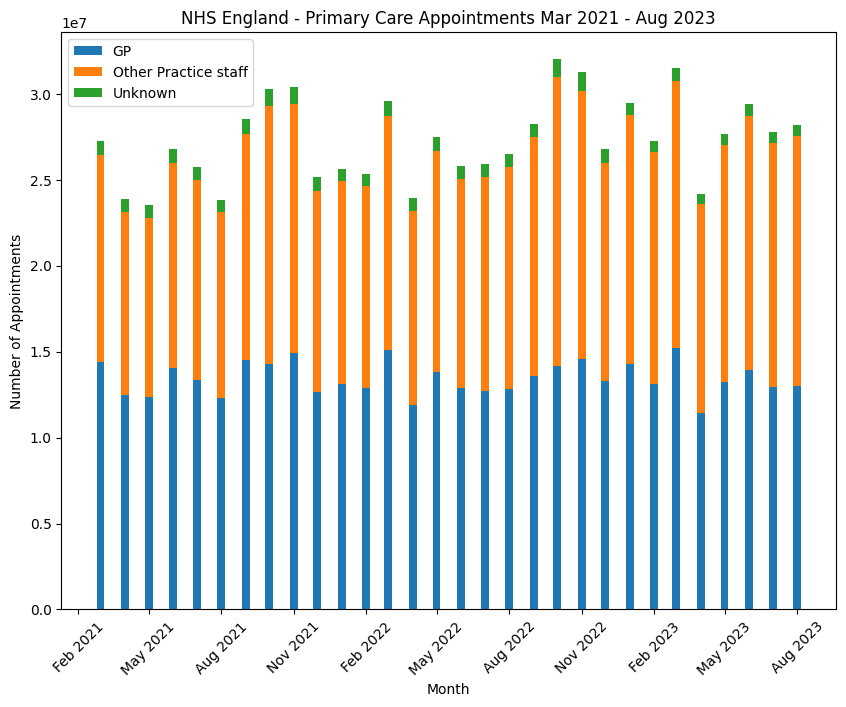

In [5]:
7

def stacked_bar_appointments(df:pd.DataFrame, title:str, ylabel:str, xlabel:str, figsize=(10,7.5)):


    fig, ax = plt.subplots(figsize=figsize)


    months = df['APPOINTMENT_MONTH'].unique()

    bottoms = np.zeros(len(months))
    for hcp_type in df['HCP_TYPE'].unique():
        hcp_type_slice = df[df['HCP_TYPE']==hcp_type].copy()
        p = ax.bar(months, hcp_type_slice['COUNT_OF_APPOINTMENTS'].values, width=10, bottom=bottoms, label=hcp_type)
        bottoms += hcp_type_slice['COUNT_OF_APPOINTMENTS'].values
    date_range = str({f"{i.strftime('%b %Y')}" for i in {months.min(),months.max()}})[1:-1].replace("'","").replace(","," -")
    ax.set_title(f'{title} {date_range}')
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.tick_params(axis='x', rotation=45)
    ax.legend()
    plt.savefig(f"{plot_counter.plot_name}.png")
    plt.show()

stacked_bar_appointments(all_area_appts_df.groupby(['APPOINTMENT_MONTH','HCP_TYPE'])[['COUNT_OF_APPOINTMENTS']].sum().reset_index(), 'NHS England - Primary Care Appointments', 'Number of Appointments', 'Month')


In [6]:
all_area_appts_df

,SUB_ICB_LOCATION_CODE,SUB_ICB_LOCATION_ONS_CODE,SUB_ICB_LOCATION_NAME,ICB_ONS_CODE,ICB_NAME,REGION_ONS_CODE,REGION_NAME,APPOINTMENT_MONTH,APPT_STATUS,HCP_TYPE,APPT_MODE,TIME_BETWEEN_BOOK_AND_APPT,COUNT_OF_APPOINTMENTS
0,02T,E38000025,NHS West Yorkshire ICB - 02T,E54000054,NHS West Yorkshire Integrated Care Board,E40000012,North East and Yorkshire,2021-03-01,Attended,GP,Face-to-Face,1 Day,1999
1,02T,E38000025,NHS West Yorkshire ICB - 02T,E54000054,NHS West Yorkshire Integrated Care Board,E40000012,North East and Yorkshire,2021-03-01,Attended,GP,Face-to-Face,15 to 21 Days,329
2,02T,E38000025,NHS West Yorkshire ICB - 02T,E54000054,NHS West Yorkshire Integrated Care Board,E40000012,North East and Yorkshire,2021-03-01,Attended,GP,Face-to-Face,2 to 7 Days,4194
3,02T,E38000025,NHS West Yorkshire ICB - 02T,E54000054,NHS West Yorkshire Integrated Care Board,E40000012,North East and Yorkshire,2021-03-01,Attended,GP,Face-to-Face,22 to 28 Days,212
4,02T,E38000025,NHS West Yorkshire ICB - 02T,E54000054,NHS West Yorkshire Integrated Care Board,E40000012,North East and Yorkshire,2021-03-01,Attended,GP,Face-to-Face,8 to 14 Days,1101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5583,92G,E38000231,NHS Bath and North East Somerset Swindon and W...,E54000040,"NHS Bath and North East Somerset, Swindon and ...",E40000006,South West,2023-08-01,Unknown,Unknown,Unknown,22 to 28 Days,202
5584,92G,E38000231,NHS Bath and North East Somerset Swindon and W...,E54000040,"NHS Bath and North East Somerset, Swindon and ...",E40000006,South West,2023-08-01,Unknown,Unknown,Unknown,8 to 14 Days,153
5585,92G,E38000231,NHS Bath and North East Somerset Swindon and W...,E54000040,"NHS Bath and North East Somerset, Swindon and ...",E40000006,South West,2023-08-01,Unknown,Unknown,Unknown,More than 28 Days,237
5586,92G,E38000231,NHS Bath and North East Somerset Swindon and W...,E54000040,"NHS Bath and North East Somerset, Swindon and ...",E40000006,South West,2023-08-01,Unknown,Unknown,Unknown,Same Day,40


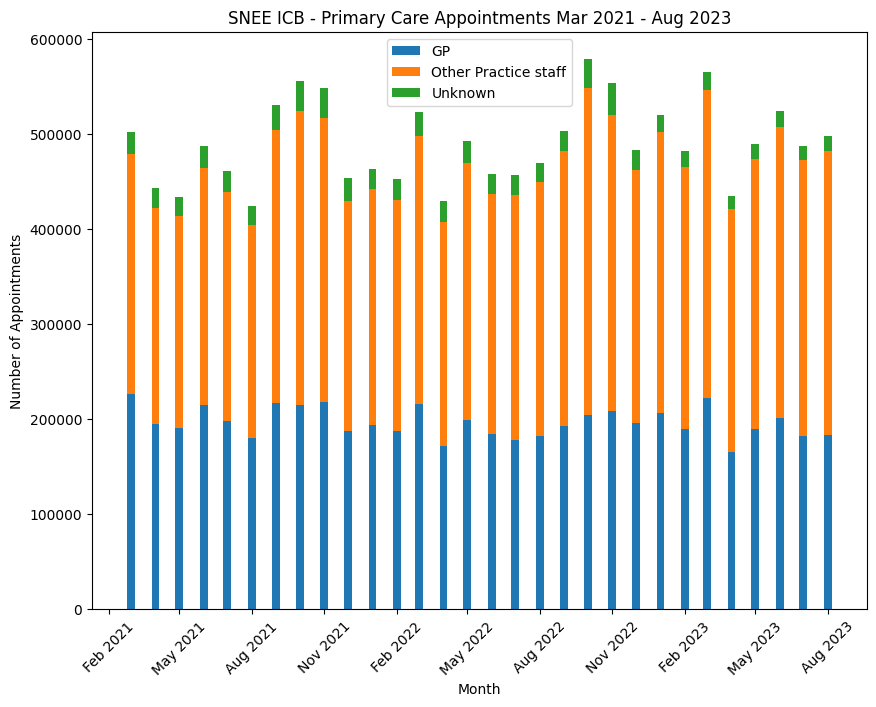

In [7]:
snee_appointments_df = (all_area_appts_df
                        .loc[all_area_appts_df['SUB_ICB_LOCATION_CODE'].isin(list(const.SUB_ICB_CODES.keys()))]
                        .groupby(['APPOINTMENT_MONTH','HCP_TYPE'])[['COUNT_OF_APPOINTMENTS']]
                        .sum()
                        .reset_index())
stacked_bar_appointments(snee_appointments_df, 'SNEE ICB - Primary Care Appointments', 'Number of Appointments', 'Month')

## load GP lists data for all areas

In [8]:
gp_list_df = catalog.get_catalog_entry_by_name('Patients Registered at a GP practice, October 2023').load()

/workspaces/PrimaryCareDemandAndCapacity/src/schemas.py:146: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(csv_file, **read_csv_kwargs)


## Feature Engineering

### Convert population to proportions

In [9]:
# keep gendered data, and age groups
gp_list_df = gp_list_df.loc[(gp_list_df['ORG_TYPE']=='SUB_ICB_LOCATION') & (gp_list_df['SEX']!='ALL')& (gp_list_df['AGE_GROUP_5']!='ALL')] 
# drop all columns except these
gp_list_df = gp_list_df.loc[:,['ORG_CODE','SEX','AGE_GROUP_5','NUMBER_OF_PATIENTS']] 
# collapse 90-94 and 95-99 into 90+
gp_list_df['AGE_GROUP_5'] = gp_list_df['AGE_GROUP_5'].replace({'90_94':'90+', '95+':'90+'}) 
# change _ to -
gp_list_df['AGE_GROUP_5'] = gp_list_df['AGE_GROUP_5'].str.replace("_",'-') 
# pivot table to get age group as columns
gp_list_df = gp_list_df.pivot_table(index='ORG_CODE',columns='AGE_GROUP_5',values='NUMBER_OF_PATIENTS',aggfunc='sum')
# get the total list size by area
gp_list_size_by_area = gp_list_df.sum(axis=1)
gp_list_size_by_area.name ='gp_list_size'
# divide each age group by the total list size
gp_list_demographic_df = gp_list_df.div(gp_list_size_by_area, axis=0)

In [10]:
all_area_appts_df = all_area_appts_df.loc[:, ['SUB_ICB_LOCATION_CODE','APPOINTMENT_MONTH','COUNT_OF_APPOINTMENTS']].groupby(['SUB_ICB_LOCATION_CODE','APPOINTMENT_MONTH'])[['COUNT_OF_APPOINTMENTS']].sum().reset_index()
all_area_appts_df = all_area_appts_df.set_index('SUB_ICB_LOCATION_CODE').join(gp_list_size_by_area).reset_index()


In [11]:
all_area_appts_df = all_area_appts_df.assign(gp_appts_per_person=lambda df : df['COUNT_OF_APPOINTMENTS']/df['gp_list_size']).drop(columns=['COUNT_OF_APPOINTMENTS', 'gp_list_size'])

In [12]:
all_area_appts_df['month_sin'] = all_area_appts_df['APPOINTMENT_MONTH'].dt.month.map(month_num_to_sin)
all_area_appts_df['month_cos'] = all_area_appts_df['APPOINTMENT_MONTH'].dt.month.map(month_num_to_cos)


In [15]:
all_area_appts_df['working_days'] = get_workingdays(all_area_appts_df['APPOINTMENT_MONTH'].dt)
all_area_appts_df['appts_per_person_per_workingday'] = all_area_appts_df['gp_appts_per_person']/all_area_appts_df['working_days']
all_area_appts_df =  all_area_appts_df.drop(columns=['working_days','APPOINTMENT_MONTH','gp_appts_per_person'])

In [19]:
training_dataset = all_area_appts_df.set_index('index').join(gp_list_demographic_df)



In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Split the dataset into features (X) and target variable (y)
X = training_dataset.drop(columns=['appts_per_person_per_workingday'])
y = training_dataset['appts_per_person_per_workingday']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 5.352257813315024e-06


,month_sin,month_cos,0-4,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,5-9,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90+
D4U1Y,-1.000000e+00,-1.836970e-16,0.051655,0.066005,0.060695,0.055146,0.062079,0.070650,0.076534,0.078010,...,0.060391,0.068826,0.064977,0.055529,0.043610,0.037056,0.034542,0.021893,0.014231,0.008167
D9Y0V,8.660254e-01,5.000000e-01,0.044754,0.057723,0.054875,0.056655,0.061111,0.066157,0.066390,0.064362,...,0.053581,0.065510,0.069489,0.065309,0.054914,0.050100,0.049306,0.030324,0.019025,0.011373
01T,8.660254e-01,5.000000e-01,0.048155,0.057529,0.052584,0.049591,0.060194,0.071641,0.069914,0.065448,...,0.056546,0.066979,0.072277,0.072548,0.058606,0.048092,0.041112,0.026327,0.017765,0.008990
72Q,-5.000000e-01,8.660254e-01,0.048198,0.055911,0.052360,0.059675,0.091257,0.100934,0.093058,0.082801,...,0.054083,0.064567,0.061201,0.050291,0.036091,0.027148,0.022982,0.014776,0.009465,0.005580
84H,5.000000e-01,8.660254e-01,0.042492,0.056188,0.059375,0.069409,0.059239,0.062621,0.062525,0.060997,...,0.050798,0.067701,0.073611,0.068852,0.059361,0.052779,0.046938,0.027332,0.016743,0.008110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
03N,1.224647e-16,-1.000000e+00,0.046413,0.056599,0.064316,0.092644,0.090616,0.078803,0.071700,0.063219,...,0.054471,0.059595,0.058934,0.052196,0.042050,0.036324,0.034614,0.021924,0.014074,0.007459
03Q,-5.000000e-01,8.660254e-01,0.040648,0.052637,0.058459,0.073038,0.067416,0.067559,0.065115,0.063020,...,0.047871,0.066214,0.068539,0.063922,0.054028,0.049691,0.047536,0.028577,0.018467,0.010088
05D,-5.000000e-01,-8.660254e-01,0.050738,0.061927,0.057145,0.048877,0.059493,0.071977,0.069385,0.065801,...,0.057927,0.067945,0.071701,0.064880,0.052284,0.045845,0.043181,0.027625,0.015799,0.009176
02Q,-5.000000e-01,8.660254e-01,0.046576,0.058026,0.052684,0.046592,0.058233,0.066335,0.064445,0.060083,...,0.055219,0.069987,0.076733,0.069700,0.057564,0.052955,0.050068,0.030102,0.017447,0.008987
